# Dataset Generation using Emulator

Start the emulator and save a screenshot containing the screen of the emulated device exactly.
Save the path to the screenshot in the variable below:

In [1]:
screenshot = 'AndroidScreenshot.png'

Run the cell below and check if the output matches the screen of the emulated device.

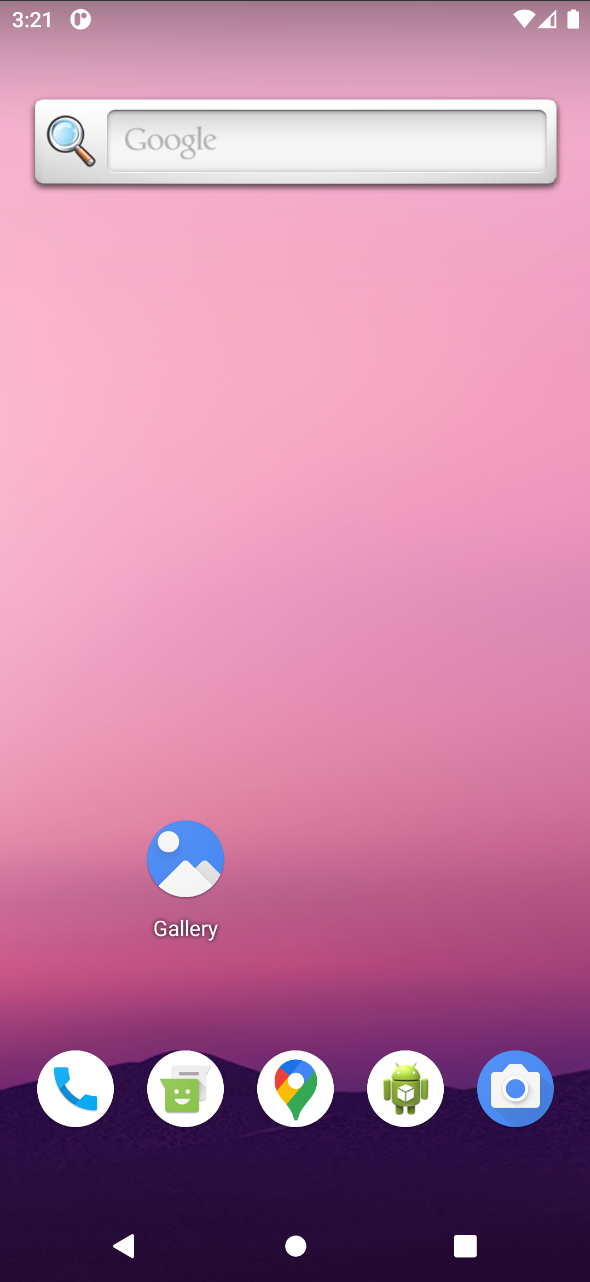

In [3]:
import pyautogui

location = pyautogui.locateOnScreen(screenshot, grayscale=True)
im = pyautogui.screenshot(region=location)
display(im)

Configure the parameters in the next cell before starting the dataset collection.

In [4]:
# Number of elements that will be collected.
DATASET_SIZE = 10
# Path of directory at which the dataset will be saved.
DATASET_PATH = "dataset/"
# IP adress of this computer.
HOST = "192.168.1.106"
# Port on which the server will listen.
PORT = 1285

Now, run the cell below. It will start a server, which the android application can then connect to and upload it's data. Thus, you can start the android application after starting the next cell. The dataset collection will happen automatically.

In [5]:
import json
import socketserver
import os

class Dataset:
    def __init__(self, size, path):
        self.total_size = size
        self.current_size = 0
        self.path = path
        # TODO: check path for validity and if dir is empty.
        
    def captureAndSaveImage(self, path: str):
        pyautogui.screenshot(path, region=location)
        
    def saveAnnotations(self, path: str, data: str):
        try:
            with open(path, "w") as file:
                file.write(data)
        except:
            print(f"Could not create file at {path} for saving annotations.")
            
    def handleCollection(self, data) -> bool:
        self.saveAnnotations(self.path + f"{self.current_size}.json", data)
        self.captureAndSaveImage(self.path + f"{self.current_size}.png")
        self.current_size = self.current_size + 1
        print(f"Progress: {self.current_size}/{self.total_size}")
        if self.current_size >= self.total_size:
            print("Dataset collected.")
            return True
        return False


dataset = Dataset(DATASET_SIZE, DATASET_PATH)
    

class TCPHandler(socketserver.StreamRequestHandler):

    def handle(self):
        # self.rfile is a file-like object created by the handler;
        # we can now use e.g. readline() instead of raw recv() calls
        self.data = self.rfile.readline().strip()
        # print("{} wrote:".format(self.client_address[0]))
        jsontext = json.loads(self.data)
        # print(json.dumps(jsontext, indent=4))
        
        collectionFinished = dataset.handleCollection(json.dumps(json.loads(self.data), indent=4))
        
        if collectionFinished:
            self.server._BaseServer__shutdown_request = True
        
        # Likewise, self.wfile is a file-like object used to write back
        # to the client
        response = {"answer": "randomize"}
        self.wfile.write(json.dumps(response).encode())

with socketserver.TCPServer((HOST, PORT), TCPHandler) as server:
    print("Starting server.")
    server.serve_forever()

Starting server.
Progress: 1/10
Progress: 2/10
Progress: 3/10
Progress: 4/10
Progress: 5/10
Progress: 6/10
Progress: 7/10
Progress: 8/10
Progress: 9/10
Progress: 10/10
Dataset collected.
